In this case study, we will explore how AllLife Bank can leverage customer segmentation to enhance its marketing and operational strategies. The bank aims to strengthen its credit card customer base in the coming year. Insights from market research suggest opportunities to improve market penetration and address customer dissatisfaction with support services. The marketing team plans to run personalized campaigns to attract new customers and upsell to existing ones, while the operations one focuses on upgrading the service delivery model. Together, they have enlisted the Data Science team to help achieve these goals.

Our goal is to identify distinct customer segments based on spending behaviour and past interactions with the bank. This segmentation will provide insights into personalized marketing strategies and improved customer service approaches.

By the end of this case study, we will demonstrate how the K-Means algorithm can help AllLife Bank understand its customer base more effectively and tailor strategies to improve customer satisfaction and loyalty.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
sns.set_theme(style='darkgrid')
warnings.filterwarnings('ignore')

In [7]:
df = pd.read_csv('Credit_data.csv')

In [8]:
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [10]:
df.isna().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
df.duplicated(subset=['Customer Key']).sum()

5

In [13]:
df.drop_duplicates(subset=['Customer Key'], inplace = True)

In [14]:
df.duplicated(subset=['Customer Key']).sum()

0

In [15]:
df.shape

(655, 7)

In [16]:
df.columns

Index(['Sl_No', 'Customer Key', 'Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made'],
      dtype='object')

In [19]:
# Descriptive Statistics
var = ['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online','Total_calls_made']

In [20]:
df[var].describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,655.0,34242.748092,37240.896986,3000.0,10000.0,18000.0,48000.0,200000.0
Total_Credit_Cards,655.0,4.691603,2.169325,1.0,3.0,5.0,6.0,10.0
Total_visits_bank,655.0,2.401527,1.633648,0.0,1.0,2.0,4.0,5.0
Total_visits_online,655.0,2.606107,2.940380,0.0,1.0,2.0,4.0,15.0
Total_calls_made,655.0,3.601527,2.867352,0.0,1.0,3.0,5.0,10.0


The dataset provides insights into customer behaviour and engagement. The average credit limit is 34,242 with a broad range from 3,000 to 200,000, indicating diverse spending capacities. 
Customers hold an average of 4.7 credit cards, ranging from 1 to 10 crads.
Bank visits average at 2.4 while online visits are slightly higher at 2.6, showing varying engagement across channels. Additionally, customers made an avergae of 3.6 calls to the bank, ranging from 0 to 10 calls. 
These metrics highlight differences in financial behavior and interaction frequency, essential for effective customer segmentation.

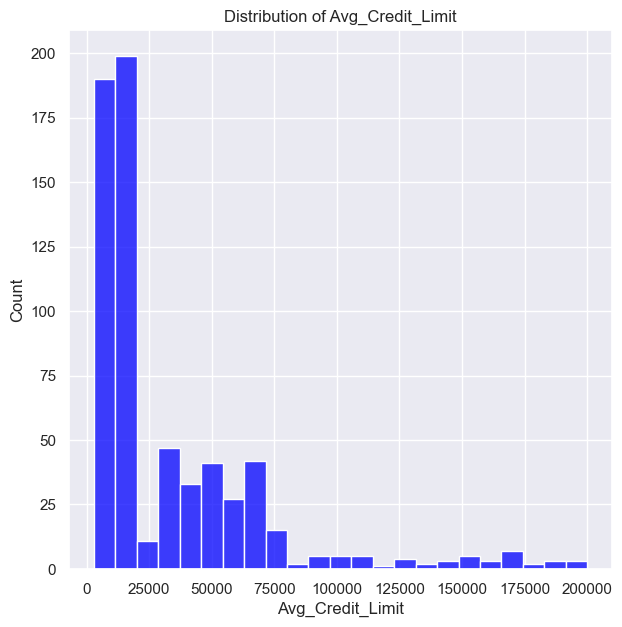

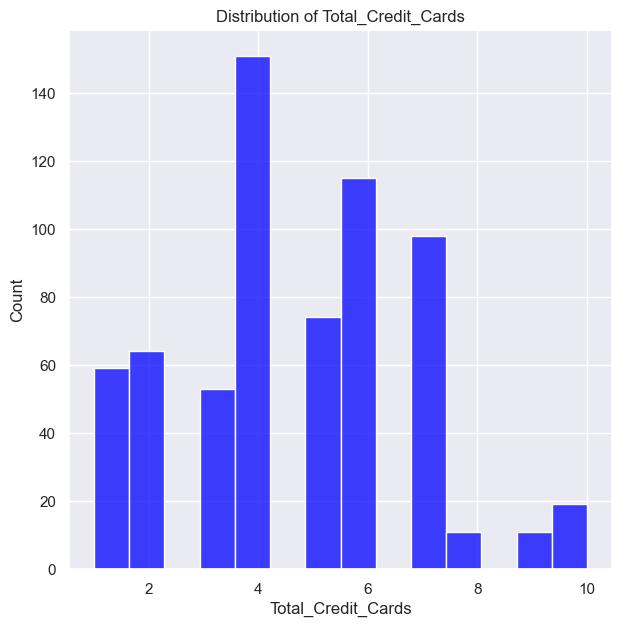

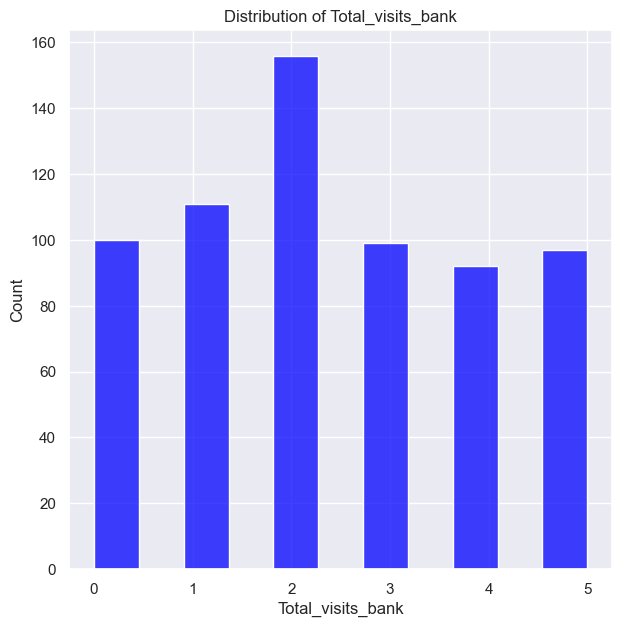

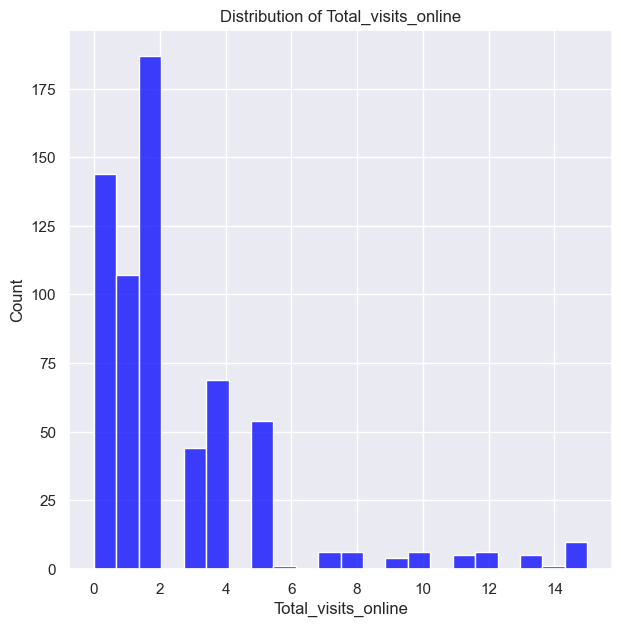

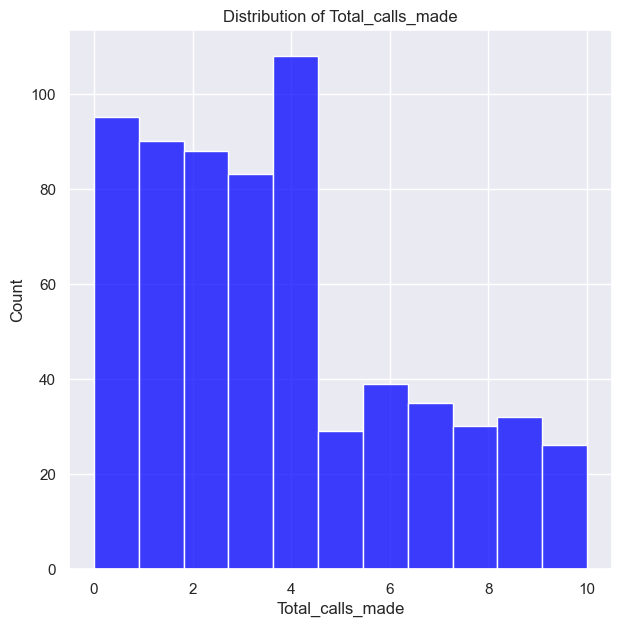

In [22]:
# Checking for distribution of variables
for variable in var:
    plt.figure(figsize = (7,7))
    sns.histplot(df[variable], color='blue')
    plt.title(f"Distribution of {variable}")
    plt.show()

In [23]:
# Check for correlation
corr = df[var].corr()
corr

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Avg_Credit_Limit,1.000000,0.611015,-0.097462,0.551740,-0.412691
Total_Credit_Cards,0.611015,1.000000,0.316306,0.168144,-0.649331
Total_visits_bank,-0.097462,0.316306,1.000000,-0.552092,-0.508962
Total_visits_online,0.551740,0.168144,-0.552092,1.000000,0.128981
Total_calls_made,-0.412691,-0.649331,-0.508962,0.128981,1.000000


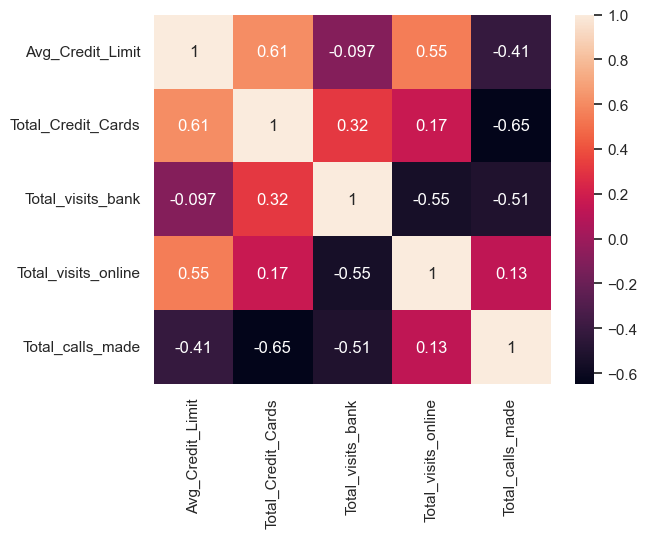

In [24]:
sns.heatmap(corr, annot_kws={"size":12}, annot = True)
plt.show()

The correlation output reveals key relationships among variables in the dataset. 
- Avg Credit limit has a moderate positive correlation with Total Credit Cards (0.61) and Total Visits Online (0.55) indicating that customers with higher credit limits tend to hold more cards and engage more online. 
- Total credit cards also has a strong negative correlation with Total calls made (-0.65), suggesting that customers with more cards tend to make fewer calls.
- Total visits bank is moderately negatively correlated with both Total visits online (-0.55) and Total calls made (-0.51), showing that customers who visit the bank more often are less likely to engage online or via calls. 
- The strong correlations among variables, such as between Average Credit Limit and Total Credit cards, suggest redundancy in the data. To address this, we will apply Principal Component Analysis (PCA) to reduce dimensionality while reataining essential information for segmentation.

In [ ]:
# Now g